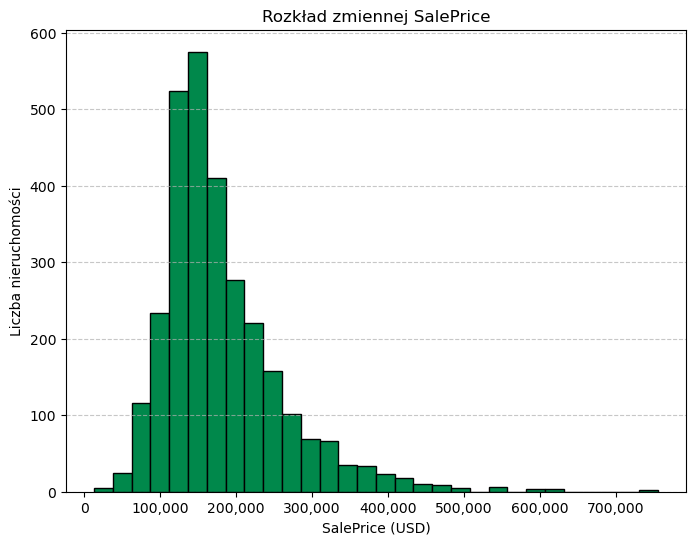

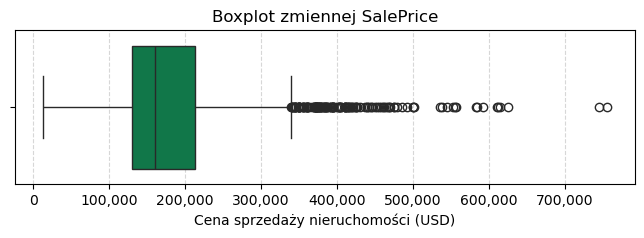

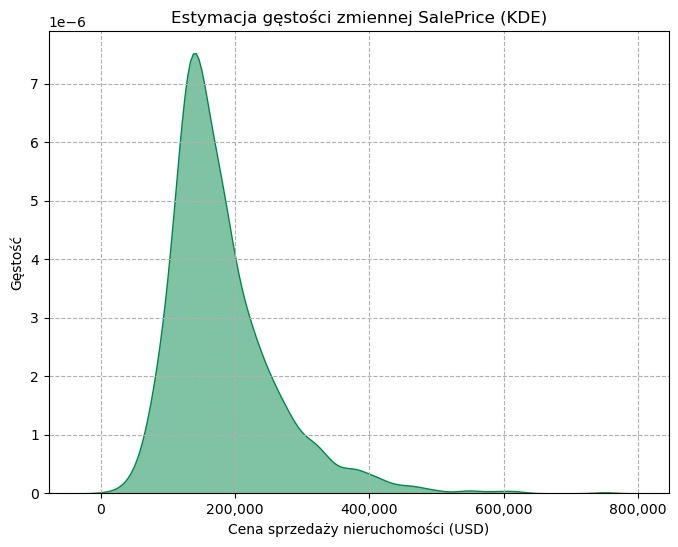

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import numpy as np

folder = "Praca inżynierska Charts"
os.makedirs(folder, exist_ok=True)

file_path = "ExportMySQL_AmesHousing.csv"
df = pd.read_csv(file_path)

saleprice_stats = df['SalePrice'].describe()

plt.style.use('default')
green_color = '#00884B'

# Histogram zmiennej SalePrice
plt.figure(figsize=(8,6))
plt.hist(df['SalePrice'], bins=30, color=green_color, edgecolor='black')
plt.title("Rozkład zmiennej SalePrice")
plt.xlabel("SalePrice (USD)")
plt.ylabel("Liczba nieruchomości")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig(os.path.join(folder, "4_2_SalePriceHistogram.png"), dpi=300, bbox_inches='tight')
plt.show()

# Boxplot zmiennej SalePrice
plt.figure(figsize=(8,2))
sns.boxplot(x=df['SalePrice'], color=green_color)
plt.title("Boxplot zmiennej SalePrice")
plt.xlabel("Cena sprzedaży nieruchomości (USD)")
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# KDE - estymacja gęstości zmiennej SalePrice
plt.figure(figsize=(8,6))
sns.kdeplot(df['SalePrice'], color=green_color, fill=True, alpha=0.5)
plt.title("Estymacja gęstości zmiennej SalePrice (KDE)")
plt.xlabel("Cena sprzedaży nieruchomości (USD)")
plt.ylabel("Gęstość")
plt.grid(True, linestyle='--')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

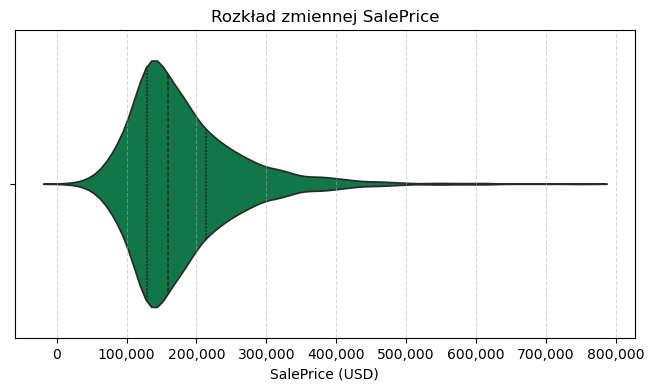

In [12]:
# Przygotowanie wykresu violin plot dla zmiennej SalePrice
plt.figure(figsize=(8,4))
sns.violinplot(x=df['SalePrice'], color=green_color, inner='quartile')
plt.title("Rozkład zmiennej SalePrice")
plt.xlabel("SalePrice (USD)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig(os.path.join(folder, "4_3_SalePriceViolit.png"), dpi=300, bbox_inches='tight')
plt.show()


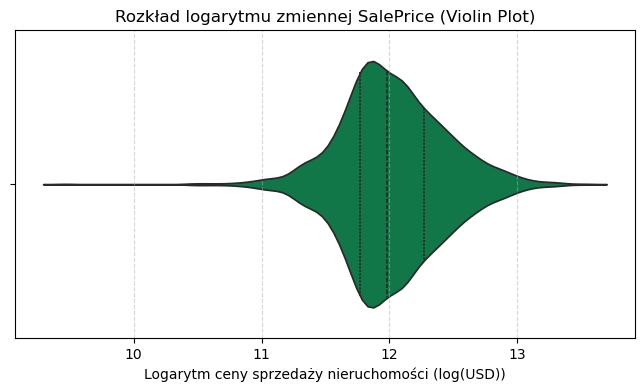

In [5]:
# Wykres violin plot dla logarytmu ceny (log(SalePrice))

df['LogSalePrice'] = np.log(df['SalePrice'])

plt.figure(figsize=(8,4))
sns.violinplot(x=df['LogSalePrice'], color=green_color, inner='quartile')
plt.title("Rozkład logarytmu zmiennej SalePrice (Violin Plot)")
plt.xlabel("Logarytm ceny sprzedaży nieruchomości (log(USD))")
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


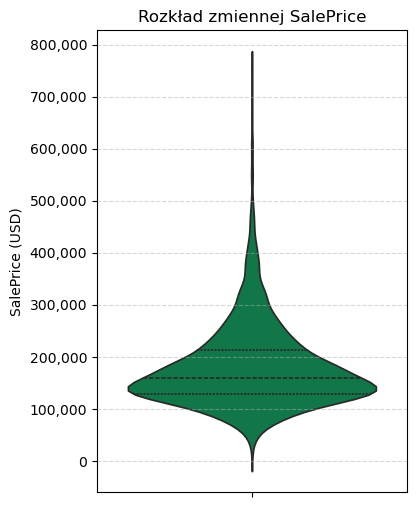

In [20]:

plt.figure(figsize=(4,6))
sns.violinplot(y=df['SalePrice'], color=green_color, inner='quartile')
plt.title("Rozkład zmiennej SalePrice")
plt.ylabel("SalePrice (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig(os.path.join(folder, "4_3_SalePriceViolin.png"), dpi=300, bbox_inches='tight')
plt.show()



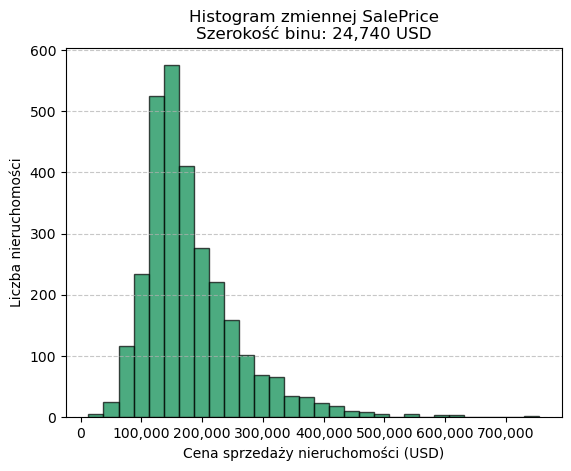

In [21]:
# Histogram z 30 binami
counts, bins, _ = plt.hist(df['SalePrice'], bins=30, color='#00884B', edgecolor='black', alpha=0.7)

bin_width = bins[1] - bins[0]

plt.title(f"Histogram zmiennej SalePrice\nSzerokość binu: {bin_width:,.0f} USD")
plt.xlabel("Cena sprzedaży nieruchomości (USD)")
plt.ylabel("Liczba nieruchomości")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

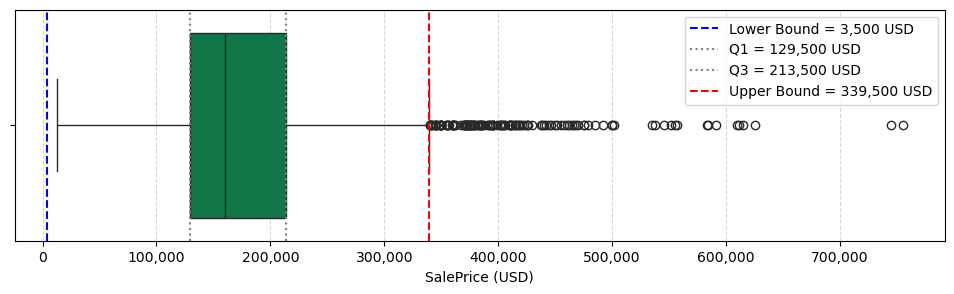

In [9]:
Q1 = np.percentile(df['SalePrice'], 25)
Q3 = np.percentile(df['SalePrice'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 3))
sns.boxplot(x=df['SalePrice'], color=green_color)

plt.xlabel("SalePrice (USD)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.axvline(lower_bound, color='blue', linestyle='--', label=f'Lower Bound = {lower_bound:,.0f} USD')
plt.axvline(Q1, color='grey', linestyle=':', label=f'Q1 = {Q1:,.0f} USD')
plt.axvline(Q3, color='grey', linestyle=':', label=f'Q3 = {Q3:,.0f} USD')
plt.axvline(upper_bound, color='red', linestyle='--', label=f'Upper Bound = {upper_bound:,.0f} USD')

plt.legend(loc='upper right')
plt.savefig(os.path.join(folder, "4_3_SalePriceBoxPlot.png"), dpi=300, bbox_inches='tight')
plt.show()


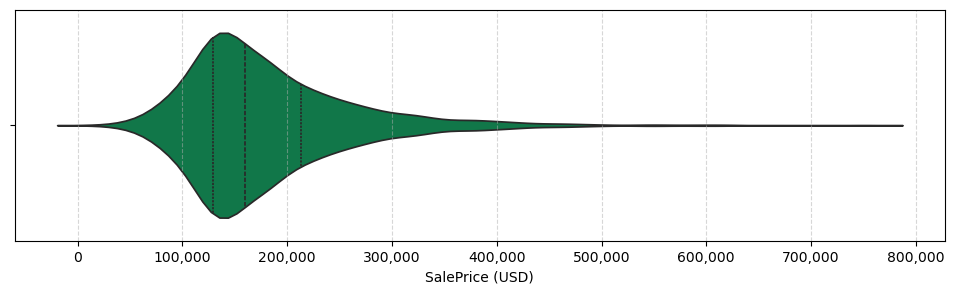

In [11]:

plt.figure(figsize=(12, 3))
sns.violinplot(x=df['SalePrice'], color=green_color, inner='quartile')

plt.xlabel("SalePrice (USD)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig(os.path.join(folder, "4_4_SalePriceViolinChart.png"), dpi=300, bbox_inches='tight')

plt.show()


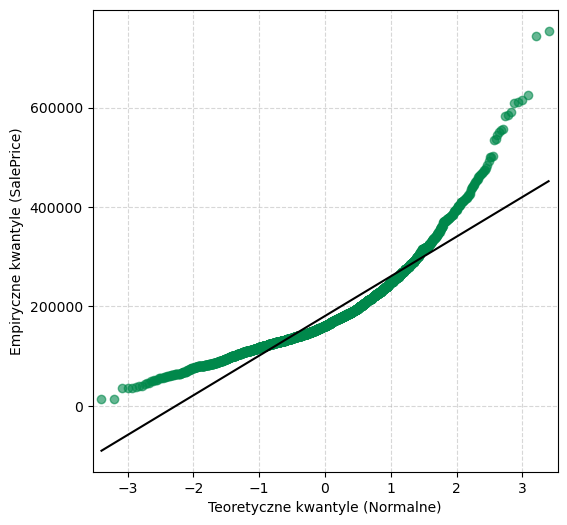

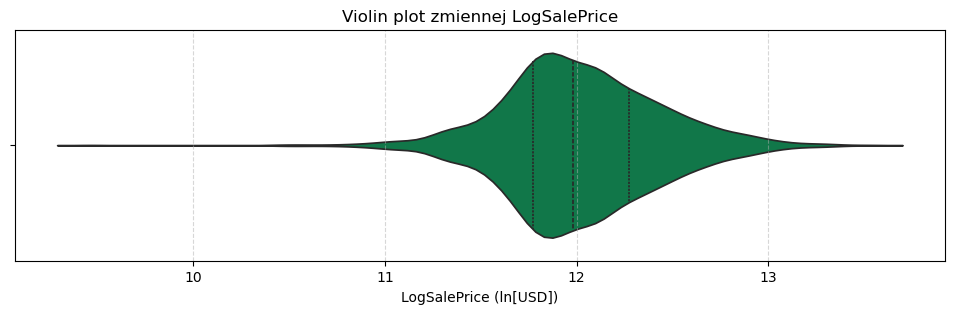

NameError: name 'shapiro' is not defined

In [40]:

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

qq = sm.qqplot(df['SalePrice'], line='s', ax=ax, marker='o', alpha=0.6)

qq.axes[0].lines[0].set_markerfacecolor('#00884B')
qq.axes[0].lines[0].set_markeredgecolor('#00884B')
qq.axes[0].lines[1].set_color('black')

ax.set_xlabel("Teoretyczne kwantyle (Normalne")
ax.set_ylabel("Empiryczne kwantyle (SalePrice)")
ax.grid(True, linestyle='--', alpha=0.5)
plt.savefig(os.path.join(folder, "4_6_SalePriceQQPlot.png"), dpi=300, bbox_inches='tight')
plt.show()


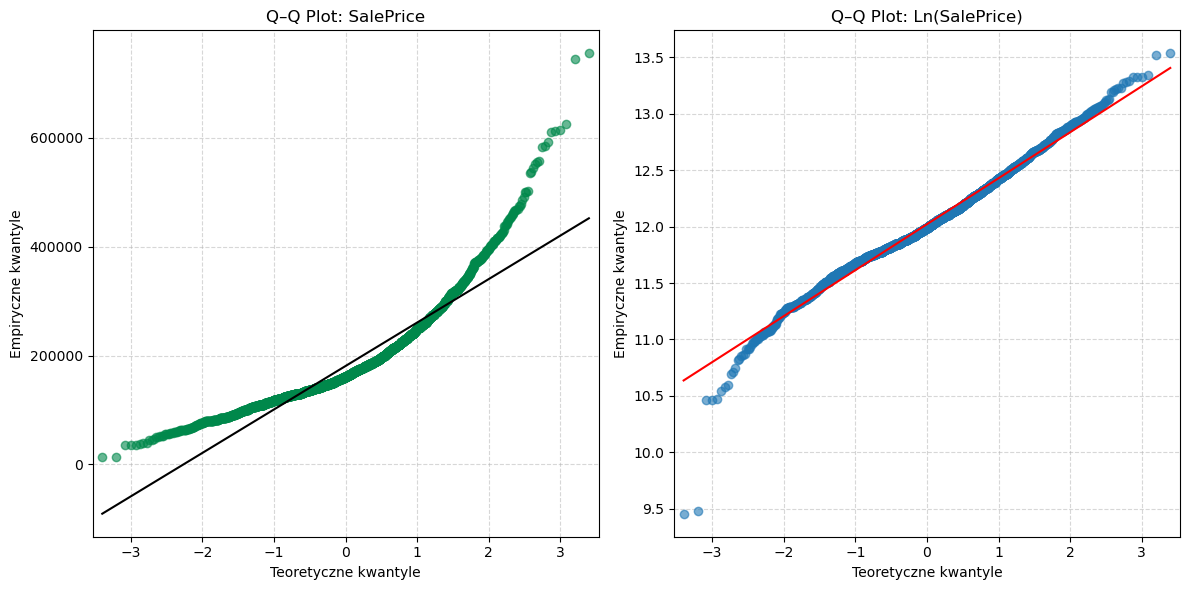

In [50]:
saleprice = df['SalePrice']
log_saleprice = df['LogSalePrice']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

qq1 = sm.qqplot(saleprice, line='s', ax=axes[0], marker='o', alpha=0.6)
qq1.axes[0].lines[0].set_markerfacecolor(green_color)
qq1.axes[0].lines[0].set_markeredgecolor(green_color)
qq1.axes[0].lines[1].set_color('black')
axes[0].set_title("Q–Q Plot: SalePrice")
axes[0].set_xlabel("Teoretyczne kwantyle")
axes[0].set_ylabel("Empiryczne kwantyle")
axes[0].grid(True, linestyle='--', alpha=0.5)

qq2 = sm.qqplot(log_saleprice, line='s', ax=axes[1], marker='o', alpha=0.6)
qq2.axes[0].lines[0].set_markerfacecolor(green_color)
qq2.axes[0].lines[0].set_markeredgecolor(green_color)
qq2.axes[0].lines[1].set_color('black')
axes[1].set_title("Q–Q Plot: Ln(SalePrice)")
axes[1].set_xlabel("Teoretyczne kwantyle")
axes[1].set_ylabel("Empiryczne kwantyle")
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig(os.path.join(folder, "4_7_SalePriceLnQQPlot.png"), dpi=300, bbox_inches='tight')
plt.show()


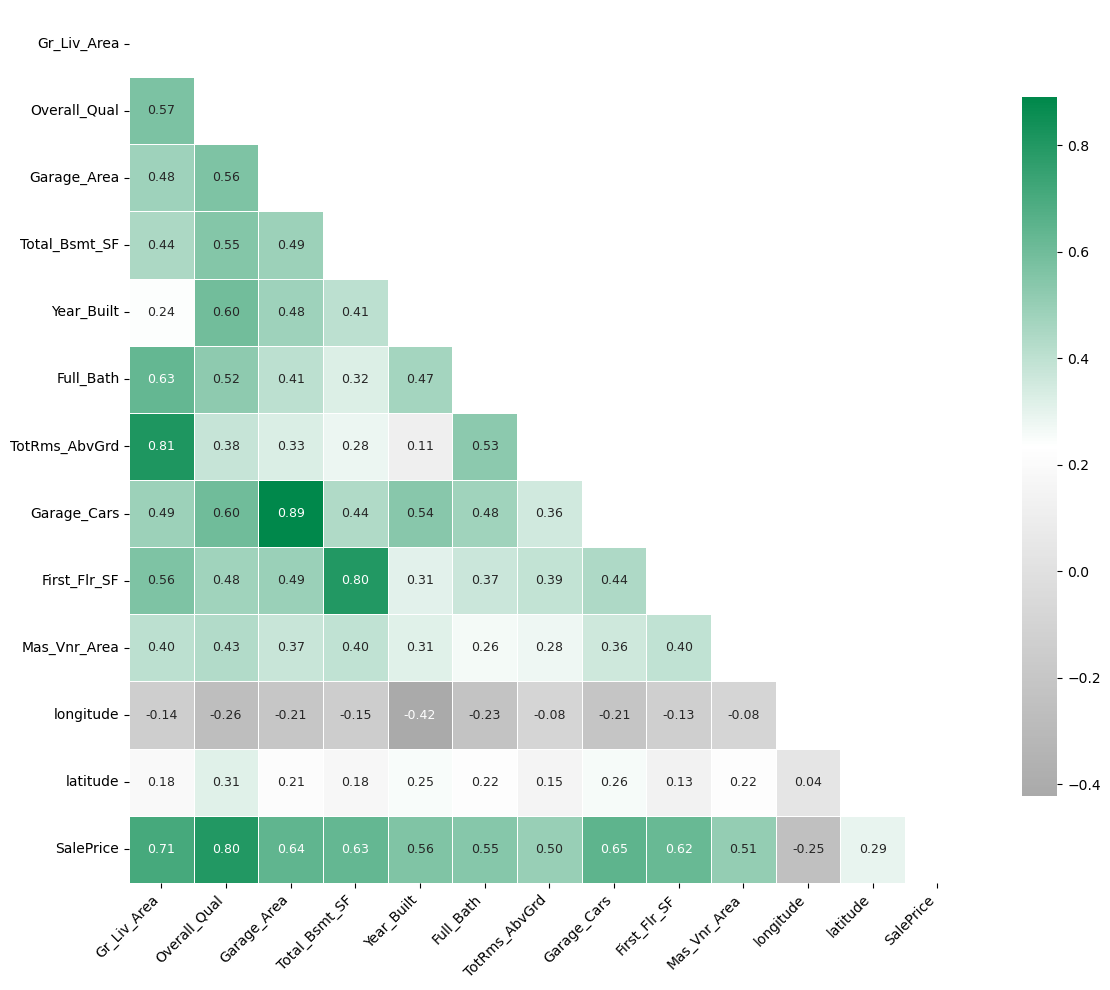

In [8]:
folder = "Praca inżynierska Charts"
os.makedirs(folder, exist_ok=True)

df = pd.read_csv("ExportMySQL_AmesHousing.csv")

selected_columns = [
    'Gr_Liv_Area', 'Overall_Qual', 'Garage_Area', 'Total_Bsmt_SF', 'Year_Built',
    'Full_Bath', 'TotRms_AbvGrd', 'Garage_Cars', 'First_Flr_SF', 'Mas_Vnr_Area',
    'longitude', 'latitude', 'SalePrice'
]


In [61]:
green_color = '#00884B'

plt.figure(figsize=(10, 6))
plt.scatter(df['Gr_Liv_Area'], df['SalePrice'], alpha=0.6, color=green_color, edgecolor='k', linewidth=0.5)

plt.xlabel('Gr_Liv_Area (sf)')
plt.ylabel('SalePrice (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
plt.tight_layout()
plt.savefig(os.path.join(folder, "5_1_SalePriceGrLivArea.png"), dpi=300, bbox_inches='tight')
plt.show()


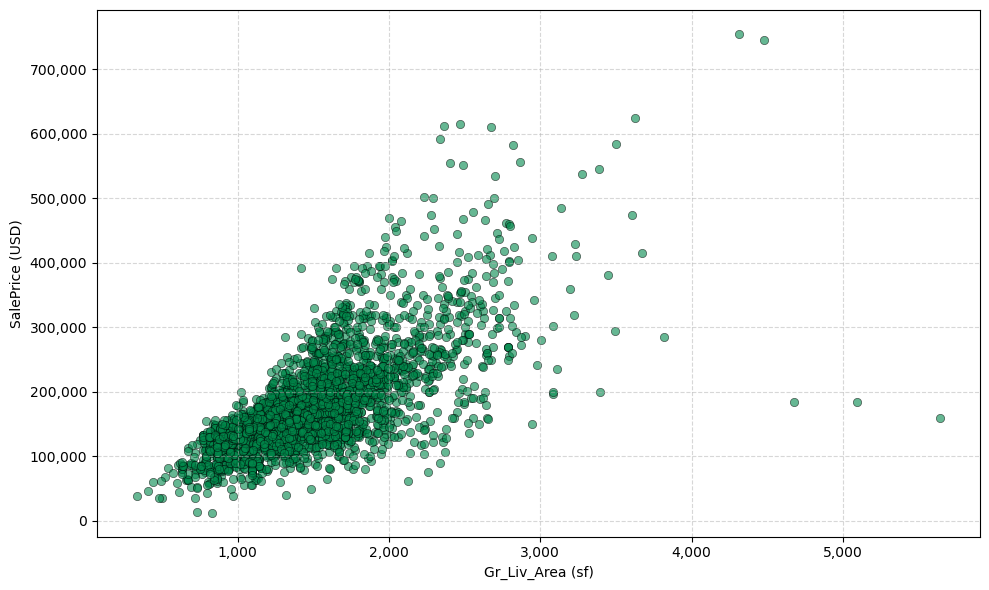

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os

folder = "Praca inżynierska Charts"
os.makedirs(folder, exist_ok=True)

# Wczytanie najnowszego pliku CSV
file_path = 'ExportMySQL_AmesHousing.csv'
df = pd.read_csv(file_path)

# Kolor używany wcześniej (zielony)
green_color = '#00884B'

# Wykres Gr_Liv_Area vs SalePrice przed usunięciem outlierów
plt.figure(figsize=(10, 6))
plt.scatter(df['Gr_Liv_Area'], df['SalePrice'], alpha=0.6, color=green_color, edgecolor='k', linewidth=0.5)

plt.xlabel('Gr_Liv_Area (sf)')
plt.ylabel('SalePrice (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}"))
plt.tight_layout()
plt.savefig(os.path.join(folder, "4_11_SalePriceGrLivArea.png"), dpi=300, bbox_inches='tight')
plt.show()


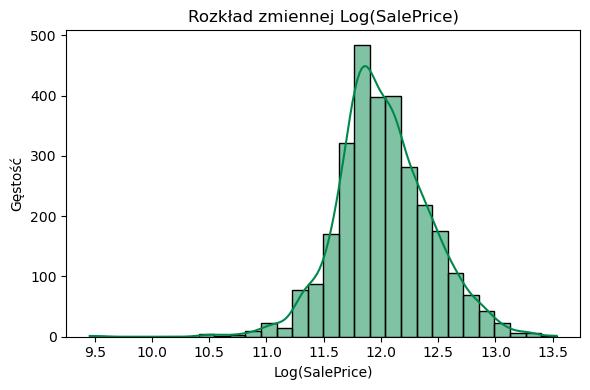

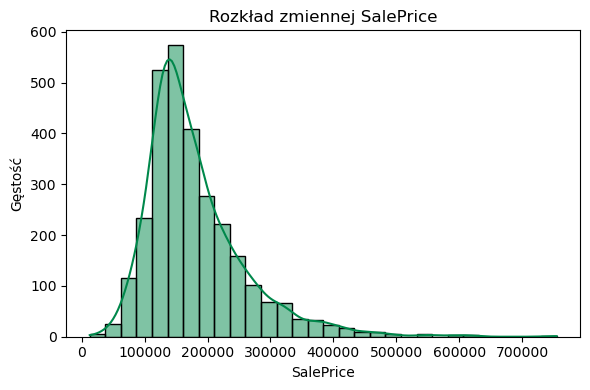

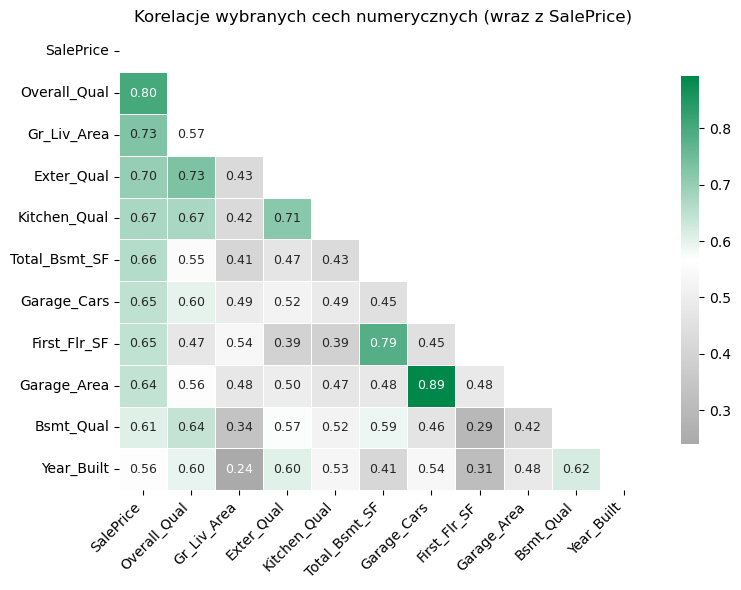

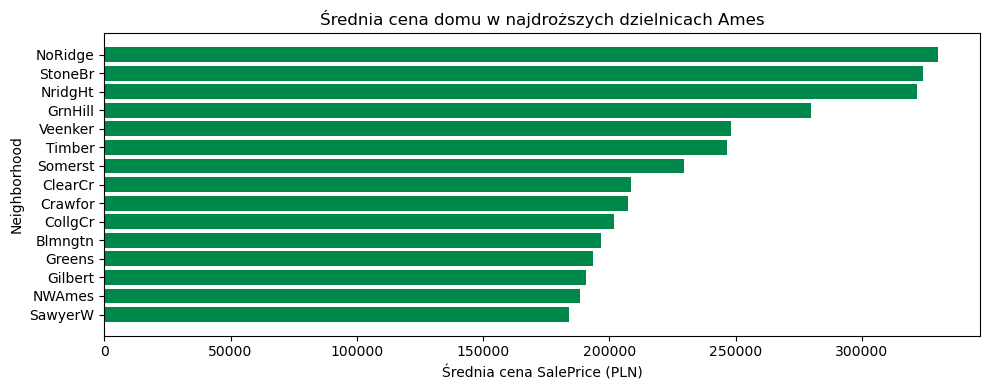

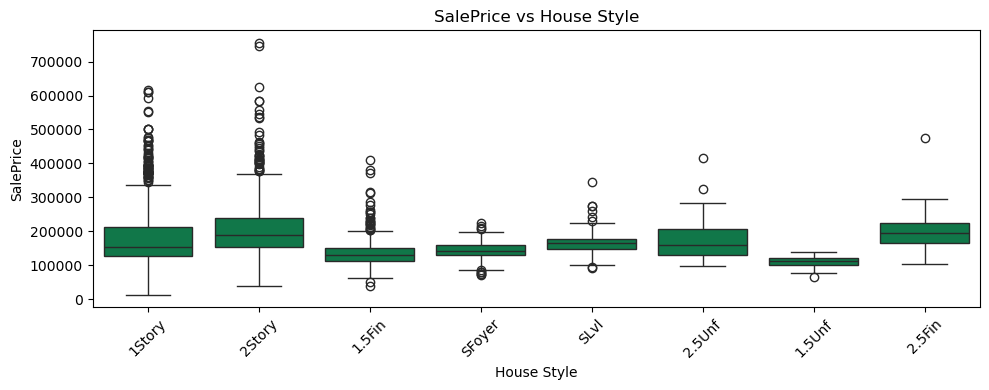

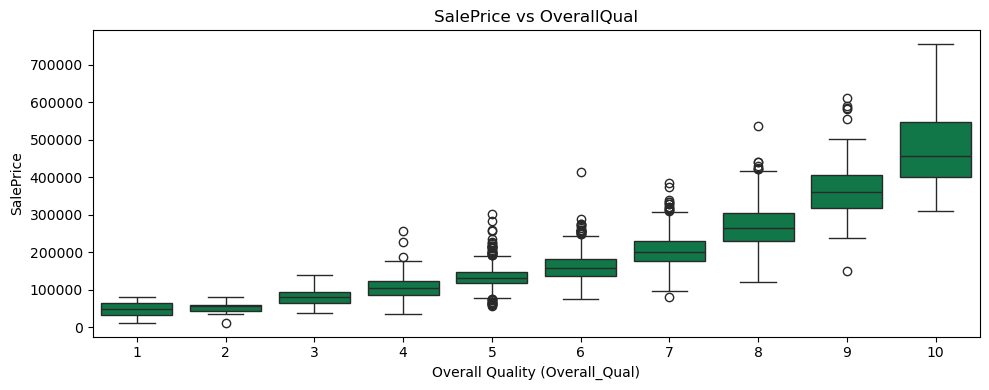

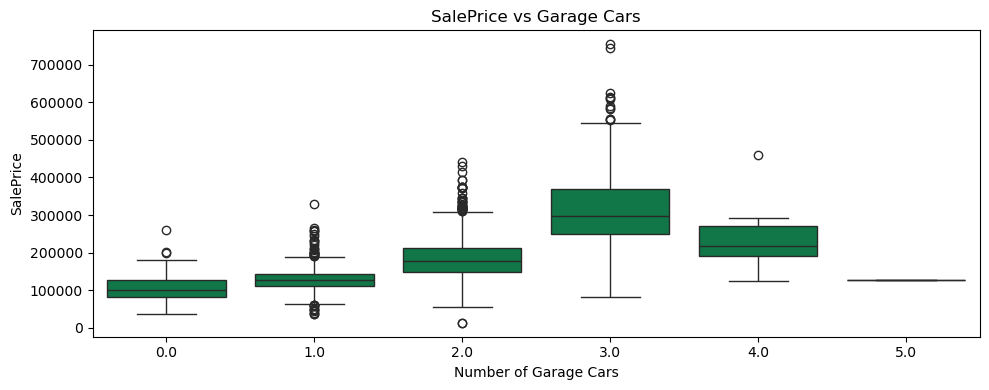

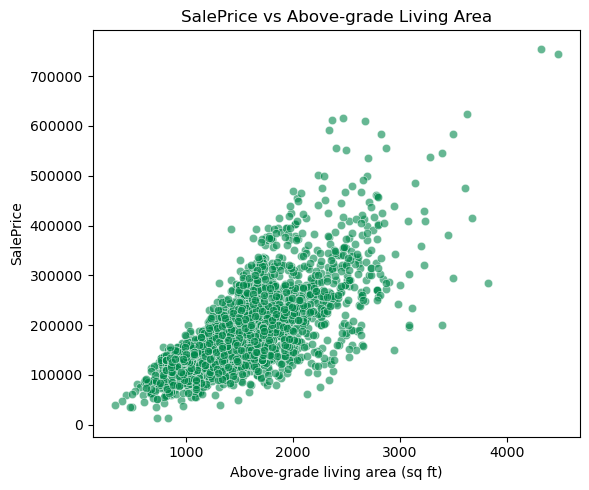